##### write an sql query in python to exlrect the country names and the reagion associate with them

In [1]:
import mysql.connector as sql

In [2]:
db=sql.connect(host='localhost',user='root',password='rohit123',database='hr')

In [3]:
db

In [4]:
import mysql.connector as c 
db=c.connect(host='localhost',user='root',password='rohit123',database='hr')
mycursor=db.cursor()

In [5]:
innerjoin="select country_name,region_name from hr.countries inner join hr.regions on countries.region_id=regions.region_id;"

In [6]:
mycursor.execute(innerjoin)

In [7]:
for row in mycursor:
    print(row)

('Belgium', 'Europe')
('Switzerland', 'Europe')
('Germany', 'Europe')
('Denmark', 'Europe')
('France', 'Europe')
('Italy', 'Europe')
('Netherlands', 'Europe')
('United Kingdom', 'Europe')
('Argentina', 'Americas')
('Brazil', 'Americas')
('Canada', 'Americas')
('Mexico', 'Americas')
('United States of America', 'Americas')
('Australia', 'Asia')
('China', 'Asia')
('HongKong', 'Asia')
('India', 'Asia')
('Japan', 'Asia')
('Singapore', 'Asia')
('Egypt', 'Middle East and Africa')
('Israel', 'Middle East and Africa')
('Kuwait', 'Middle East and Africa')
('Nigeria', 'Middle East and Africa')
('Zambia', 'Middle East and Africa')
('Zimbabwe', 'Middle East and Africa')


##### task 2

In [59]:
query=("select country_name,count(employee_id) from countries inner join locations inner join departments inner join employees on countries.country_id=locations.country_id and locations.location_id=departments.location_id and departments.department_id=employees.department_id group by country_name")
mycursor.execute(query)

In [60]:
employee_detail=mycursor.fetchall()

In [61]:
employee_detail

[('United States of America', 68),
 ('Canada', 2),
 ('United Kingdom', 35),
 ('Germany', 1)]

In [62]:
import pandas as pd

In [64]:
df_emp=pd.DataFrame(employee_detail,columns=['country_name','employee column'])
df_emp

,country_name,employee column
0,United States of America,68
1,Canada,2
2,United Kingdom,35
3,Germany,1


In [26]:
import pandas as pd
from sqlalchemy import create_engine

In [30]:
pip install pymysql

  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/e5/30/20467e39523d0cfc2b6227902d3687a16364307260c75e6a1cb4422b0c62/PyMySQL-1.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.8 kB ? eta -:--:--
   ------------------ --------------------- 20.5/44.8 kB 165.2 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/44.8 kB 245.8 kB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 kB 221.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
engine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost',db='hr',user='root',pw='rohit123'))

In [32]:
df_emp.to_sql('employee_count',engine,index=False)

4

In [33]:
import mysql.connector as sql 
db=sql.connect(host='localhost',user='root',password='rohit123',database='hr')
mycursor=db.cursor()

In [41]:
mycursor.execute("select * from  employee_count")
a=mycursor.fetchall
a
for i in mycursor:
    print(i)

('United States of America', 68)
('Canada', 2)
('United Kingdom', 35)
('Germany', 1)


###### task 3

In [45]:
mycursor.execute("select country_name,city,count(employee_id) from countries inner join locations inner join departments inner join employees on countries.country_id=locations.country_id and locations.location_id=departments.location_id and departments.department_id=employees.department_id group by country_name,locations.city")
emp=mycursor.fetchall()
emp

[('United States of America', 'Southlake', 5),
 ('United States of America', 'South San Francisco', 45),
 ('United States of America', 'Seattle', 18),
 ('Canada', 'Toronto', 2),
 ('United Kingdom', 'London', 1),
 ('United Kingdom', 'Oxford', 34),
 ('Germany', 'Munich', 1)]

In [48]:
df_emp1=pd.DataFrame(emp,columns=['country_name','city','employee_count'])
df_emp1.to_csv('employee count city and country wise')
df_emp1

,country_name,city,employee_count
0,United States of America,Southlake,5
1,United States of America,South San Francisco,45
2,United States of America,Seattle,18
3,Canada,Toronto,2
4,United Kingdom,London,1
5,United Kingdom,Oxford,34
6,Germany,Munich,1


In [49]:
df_emp1.sort_values(['employee_count'],ascending=True,inplace=True)


In [52]:
import matplotlib.pyplot as plt

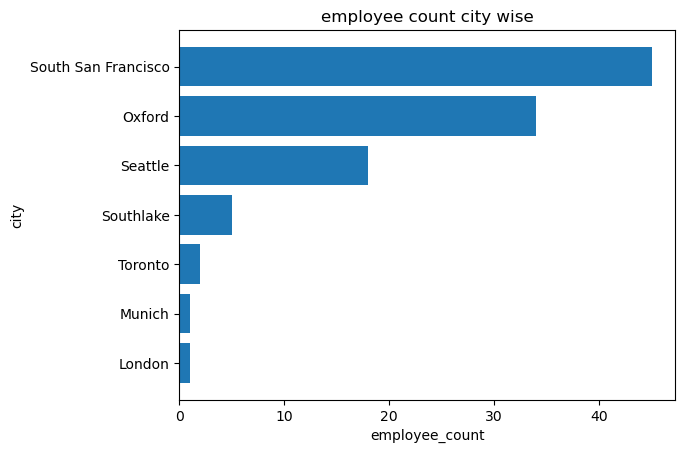

In [53]:
plt.barh(df_emp1.city,df_emp1.employee_count)
plt.title('employee count city wise')
plt.xlabel('employee_count')
plt.ylabel('city')
plt.show()